# Project2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

### 1. 데이터 가져오기 / datetime 칼럼 datetime 자료형으로 변환

In [2]:
data_dir = "C:/Users/Jennie/Desktop/aiffel/Aiffel_MiniProject2/bike-sharing-demand"
train = pd.read_csv(data_dir + '/train.csv')
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train['datetime_n'] = pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime_n']).year
train['month'] = pd.DatetimeIndex(train['datetime_n']).month
train['day'] = pd.DatetimeIndex(train['datetime_n']).day
train['hour'] = pd.DatetimeIndex(train['datetime_n']).hour
train['minute'] = pd.DatetimeIndex(train['datetime_n']).minute
train['second'] = pd.DatetimeIndex(train['datetime_n']).second
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
train = train.drop(columns =['datetime'])
train.tail()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_n,year,month,day,hour,minute,second
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012,12,19,22,0,0
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012-12-19 23:00:00,2012,12,19,23,0,0


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by second')]

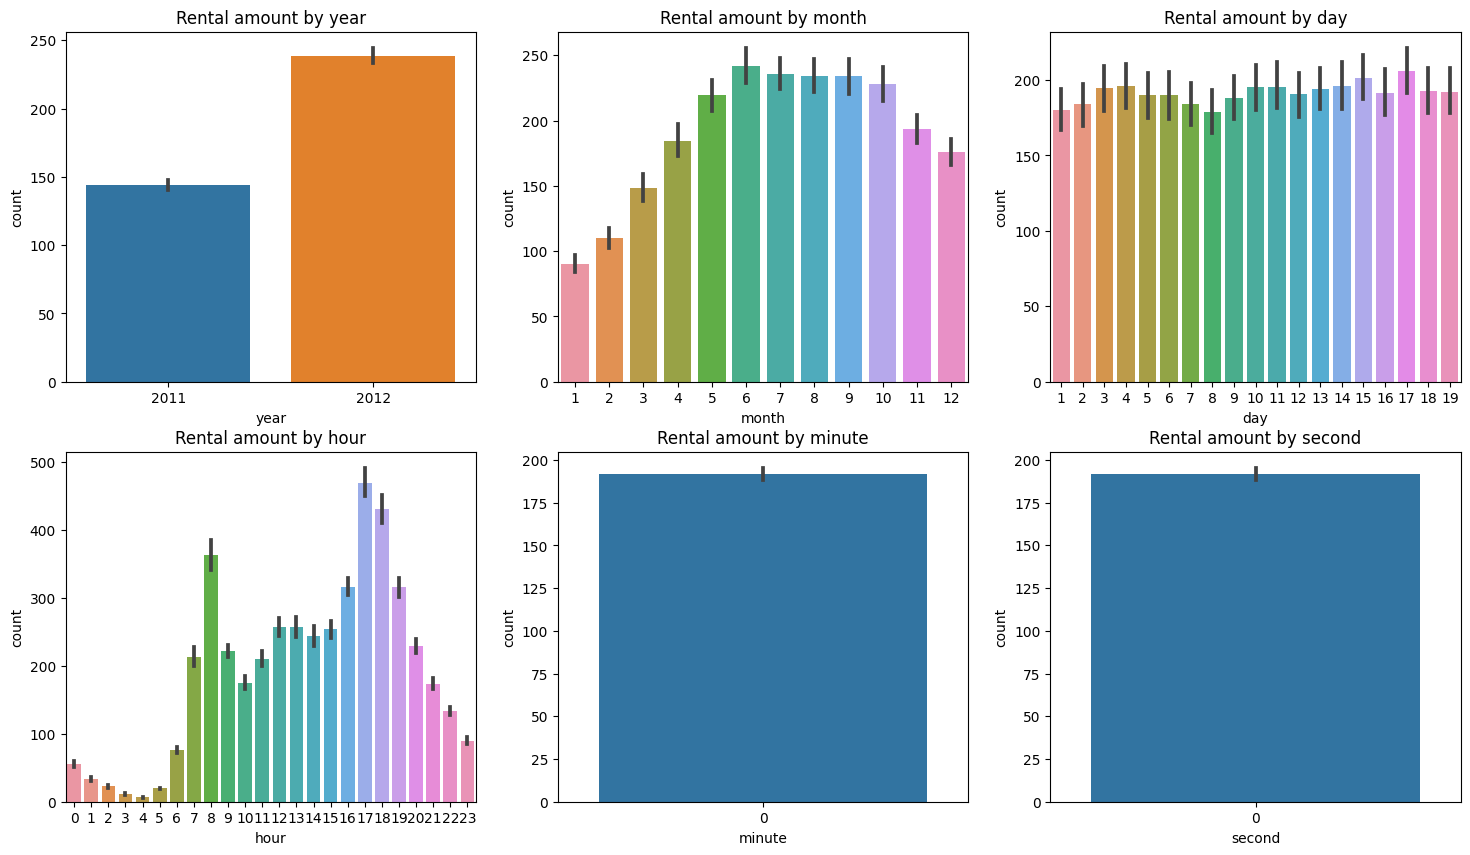

In [4]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "day", y = "count", ax = ax3)
sns.barplot(data=train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=train, x = "minute", y = "count", ax = ax5)
sns.barplot(data=train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")
ax5.set(ylabel = "count", title = "Rental amount by minute")
ax6.set(ylabel = "count", title = "Rental amount by second")

### 2. X, Y 칼럼 선택 및 train/test 데이터 분리

In [134]:
train_corr = train.corr() #correlation
cor3 = train_corr['count'].sort_values(ascending=False)
cor3

C:\Users\Jennie\AppData\Local\Temp\ipykernel_31980\3091004481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr() #correlation


count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
minute             NaN
second             NaN
Name: count, dtype: float64

In [7]:
train.describe()
# registered와 높은 상관관계를 가지지만 가입자이기 때문에 사용해야할 feature에서 제외
# Temp와 atemp중에서는 하나만 사용! 온도와 체감온도는 비슷하기 때문에 둘 중 하나만
# casual도 마찬가지로 가입하지 않은 렌탈 사용자이기 때문에 이 또한 feature에서 제외

# day의 max가 19 19일까지밖에 없음 (삭제 칼럼)
# minute과 second도 삭제 칼럼
delete_col = set(train[['minute','second','day', 'registered','casual','atemp']])
train_col = list(train.columns)
corr_dt = [i for i in train_col if i not in delete_col]
corr_dt

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'count',
 'datetime_n',
 'year',
 'month',
 'hour']

C:\Users\Jennie\AppData\Local\Temp\ipykernel_17744\2863424695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[corr_dt].corr(), annot=True, cmap=plt.cm.PuBu, linecolor='white')


<AxesSubplot:>

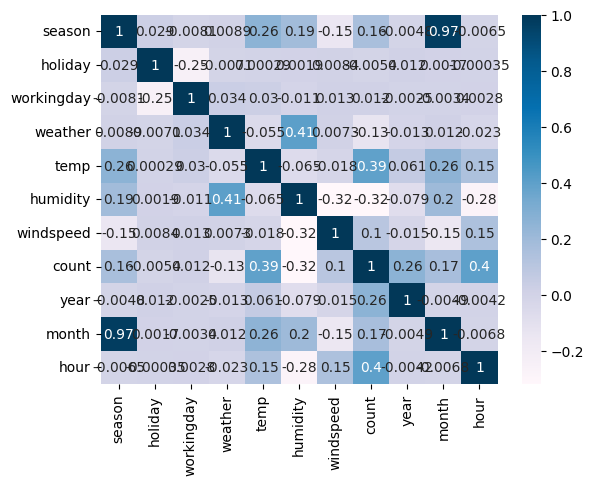

In [8]:
sns.heatmap(train[corr_dt].corr(), annot=True, cmap=plt.cm.PuBu, linecolor='white')
# registered와 높은 상관관계를 가지지만 가입자이기 때문에 사용해야할 feature에서 제외
# Temp와 atemp중에서는 하나만 사용! 온도와 체감온도는 비슷하기 때문에 둘 중 하나만
# casual도 마찬가지로 가입하지 않은 렌탈 사용자이기 때문에 이 또한 feature에서 제외

In [59]:
X = train.loc[:, ['temp', 'season', 'humidity', 'workingday', 'holiday','weather', 'windspeed', 'month', 'hour']]
Y = train.loc[:, ['count']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(Y)
Y = scaler.transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('학습 데이터 shape:', x_train.shape, y_train.shape)
print('검증 데이터 shape:', x_test.shape, y_test.shape)

학습 데이터 shape: (8708, 9) (8708, 1)
검증 데이터 shape: (2178, 9) (2178, 1)


In [62]:
X_test = pd.DataFrame(X)
X_test.describe()
# year의 분산이 높기 때문에 그리고 2011과 2012만 있기 때문에 사용 feature에서 제외

,0,1,2,3,4,5,6,7,8
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.483098,0.502205,0.618865,0.680875,0.028569,0.139476,0.224563,0.501954,0.501809
std,0.193917,0.372058,0.192450,0.466159,0.166599,0.211280,0.143245,0.313125,0.300689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.333333,0.470000,0.000000,0.000000,0.000000,0.122840,0.272727,0.260870
50%,0.489796,0.666667,0.620000,1.000000,0.000000,0.000000,0.228047,0.545455,0.521739
75%,0.632653,1.000000,0.770000,1.000000,0.000000,0.333333,0.298225,0.818182,0.782609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
Y_test = pd.DataFrame(Y)
Y_test.describe()

,0
count,10886.000000
mean,0.195260
std,0.185599
min,0.000000
25%,0.042008
50%,0.147541
75%,0.289959
max,1.000000


### 3. LinearRegression 모델 학습

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
mse_loss = mean_squared_error(y_test, prediction)
rmse_loss = np.sqrt(mse_loss)

print('MSE Loss: ', mse_loss)
print('RMSE Loss: ', rmse_loss)
print('TrainSet Score:', model.score(x_train, y_train))
print('TestSet Score:', model.score(x_test, y_test))

MSE Loss:  0.02284364421014054
RMSE Loss:  0.15114114003189383
TrainSet Score: 0.33291499588005113
TestSet Score: 0.34919433874783823


### 4. X축은 temp or humidity, y축은 count 시각화

In [74]:
x_test = pd.DataFrame(x_test)
x_test[[0]]
y_test = pd.DataFrame(y_test)
y_test[[0]]

,0
0,0.188525
1,0.316598
2,0.663934
3,0.306352
4,0.223361
...,...
2173,0.042008
2174,0.729508
2175,0.275615
2176,0.239754


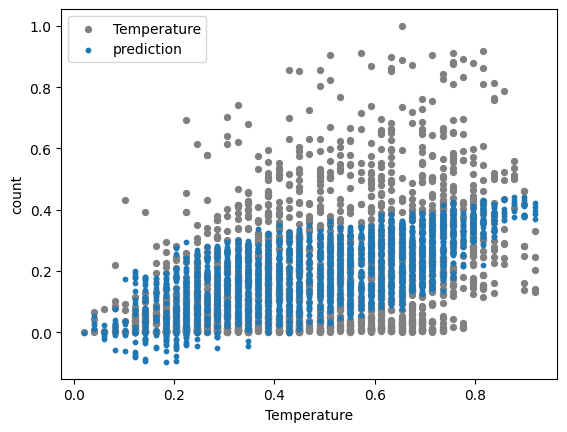

In [75]:
plt.scatter(x_test[[0]], y_test[[0]], s=18, color='grey', label="Temperature")
plt.scatter(x_test[[0]], prediction, s= 10, label="prediction")
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('count')
plt.show()

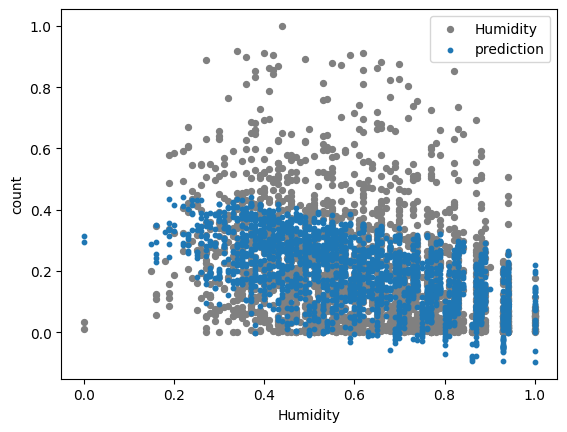

In [76]:
plt.scatter(x_test[[2]], y_test[[0]], s=18, color='grey', label="Humidity")
plt.scatter(x_test[[2]], prediction, s=10, label="prediction")
plt.legend()
plt.xlabel('Humidity')
plt.ylabel('count')
plt.show()